# Dataload & Imports

In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly_resampler import FigureResampler, FigureWidgetResampler
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
pump_station_data = pd.read_parquet("/home/s193864/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet")
pump_station_data.head(5)
pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] > 0) & (pump_station_data["pump4_rpm"] == 0)]
train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 

# Static Model


## Hvad vil vi modellere?
* Outflow over rpm
    * Pump1
    * Pump2
* Power over rpm
* Power over outflow

### Outflow as a function of pump speed.

In [3]:
x_train = train["pump1_rpm"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump1_rpm"].values.reshape(-1,1)
y_test = test["outflow"].values.reshape(-1,1)

mask = y_test >= 0.9*x_test-680
filtered_x = x_test[mask]
filtered_y = y_test[mask]

coefficients = np.polyfit(filtered_x, filtered_y, 1)

fit_curve = np.poly1d(coefficients)
x_series = np.arange(0, 1400, 1)
y_fit = coefficients[0]*x_series+coefficients[1]

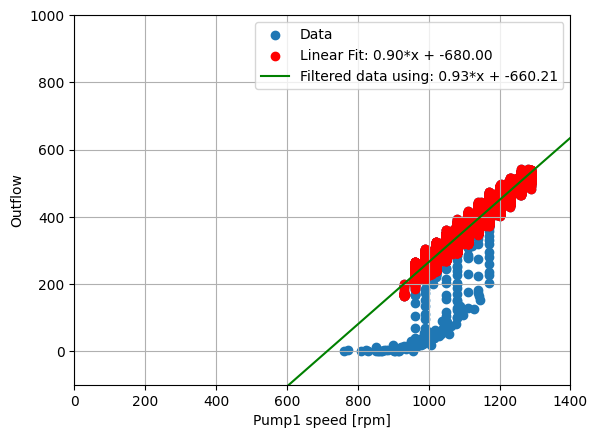

In [4]:
plt.scatter(y=y_test, x=x_test, label="Data")
plt.scatter(y=filtered_y, x=filtered_x, color="red", label=f'Linear Fit: {0.9:.2f}*x + {-680:.2f}')
plt.plot(y_fit, color="g", label=f'Filtered data using: {coefficients[0]:.2f}*x + {coefficients[1]:.2f}')
plt.legend()
plt.xlim(0, 1400)
plt.ylim(-100, 1000)
plt.ylabel("Outflow")
plt.xlabel("Pump1 speed [rpm]")
plt.grid(True)

In [5]:
pump_station_data = pd.read_parquet("/home/s193864/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet")
pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] == 0) & (pump_station_data["pump4_rpm"] > 0)]
train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 
x_train = train["pump4_rpm"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump4_rpm"].values.reshape(-1,1)
y_test = test["outflow"].values.reshape(-1,1)


In [6]:

mask = y_test >= 1.17*x_test-800 
filtered_x_temp = x_test[mask]
filtered_y_temp = y_test[mask]
filtered_x_temp = filtered_x_temp.reshape(-1,1)
filtered_y_temp = filtered_y_temp.reshape(-1,1)

mask =  filtered_x_temp >=700

filtered_x = filtered_x_temp[mask]
filtered_y = filtered_y_temp[mask]

coefficients = np.polyfit(filtered_x, filtered_y, 1)

fit_curve = np.poly1d(coefficients)
x_series = np.arange(0, 1400, 1)
y_fit = coefficients[0]*x_series+coefficients[1]

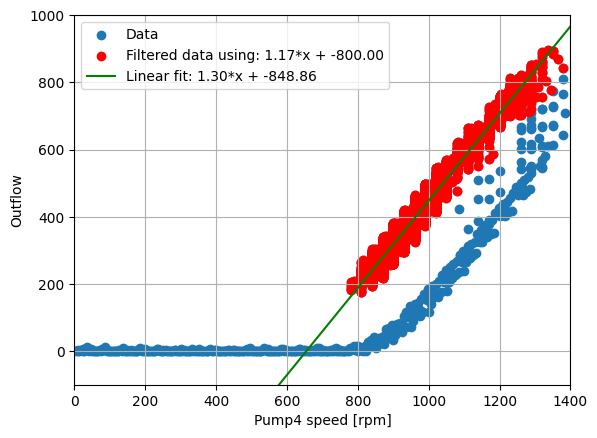

In [7]:
plt.scatter(y=y_test, x=x_test, label="Data")
plt.scatter(y=filtered_y, x=filtered_x, color="red", label=f'Filtered data using: {1.17:.2f}*x + {-800:.2f}')
plt.plot(y_fit, color="g", label=f'Linear fit: {coefficients[0]:.2f}*x + {coefficients[1]:.2f}')
plt.legend()
plt.xlim(0, 1400)
plt.ylim(-100, 1000)
plt.ylabel("Outflow")
plt.xlabel("Pump4 speed [rpm]")
plt.grid(True)

### Power as a function of pump speed.

In [8]:
pump_station_data = pd.read_parquet("/home/s193864/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet")
pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] == 0) & (pump_station_data["pump4_rpm"] > 0)]
train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 
x_train = train["pump4_rpm"].values.reshape(-1,1)
y_train = train["pump4_power"].values.reshape(-1,1)
x_test = test["pump4_rpm"].values
y_test = test["pump4_power"].values

In [9]:
mask = x_test >= 300
filtered_x = x_test[mask]
filtered_y = y_test[mask]

coefficients = np.polyfit(filtered_x, filtered_y, 1)


fit_curve = np.poly1d(coefficients)
x_series = np.arange(0, 1400, 1)
y_fit = coefficients[0]*x_series+coefficients[1]

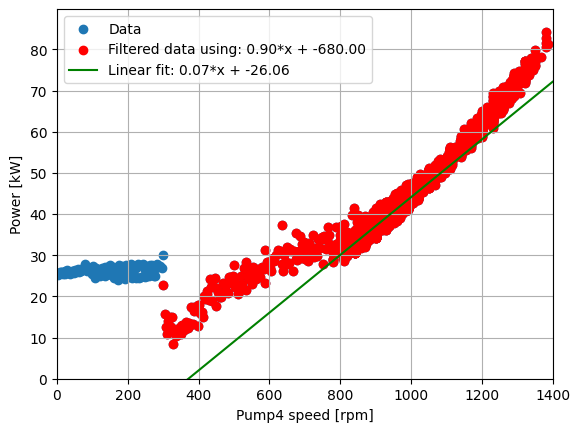

In [10]:
plt.scatter(y=y_test, x=x_test, label="Data")
plt.scatter(y=filtered_y, x=filtered_x, color="red", label=f'Filtered data using: {0.9:.2f}*x + {-680:.2f}')
plt.plot(y_fit, color="g", label=f'Linear fit: {coefficients[0]:.2f}*x + {coefficients[1]:.2f}')
plt.legend()
plt.xlim(0, 1400)
plt.ylim(0)
plt.ylabel("Power [kW]")
plt.xlabel("Pump4 speed [rpm]")
plt.grid(True)

In [11]:
pump_station_data = pd.read_parquet("/home/s193864/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet")
pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] > 0) & (pump_station_data["pump4_rpm"] == 0)]
train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 
x_train = train["pump1_rpm"].values.reshape(-1,1)
y_train = train["pump1_power"].values.reshape(-1,1)
x_test = test["pump1_rpm"].values
y_test = test["pump1_power"].values

In [12]:
mask = x_test >= 900
filtered_x = x_test[mask]
filtered_y = y_test[mask]

coefficients = np.polyfit(filtered_x, filtered_y, 1)

fit_curve = np.poly1d(coefficients)
x_series = np.arange(0, 1400, 1)
y_fit = coefficients[0]*x_series+coefficients[1]

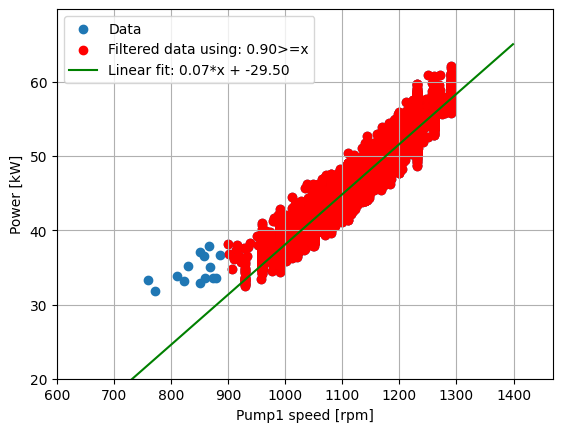

In [13]:
plt.scatter(y=y_test, x=x_test, label="Data")
plt.scatter(y=filtered_y, x=filtered_x, color="red", label=f'Filtered data using: {0.9:.2f}>=x')
plt.plot(y_fit, color="g", label=f'Linear fit: {coefficients[0]:.2f}*x + {coefficients[1]:.2f}')
plt.legend()
plt.xlim(600)
plt.ylim(20)
plt.ylabel("Power [kW]")
plt.xlabel("Pump1 speed [rpm]")
plt.grid(True)

### Outflow vs. Power

In [14]:
pump_station_data = pd.read_parquet("/home/s193864/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet")
pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] == 0) & (pump_station_data["pump4_rpm"] > 0)]
train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 
x_train = train["pump4_power"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump4_power"].values
y_test = test["outflow"].values

In [15]:
mask = y_test >= 16.2*x_test-400
filtered_x_temp = x_test[mask]
filtered_y_temp = y_test[mask]
filtered_x_temp = filtered_x_temp.reshape(-1,1)
filtered_y_temp = filtered_y_temp.reshape(-1,1)

mask =  filtered_x_temp >=25

filtered_x = filtered_x_temp[mask]
filtered_y = filtered_y_temp[mask]

coefficients = np.polyfit(filtered_x, filtered_y, 1)

fit_curve = np.poly1d(coefficients)
x_series = np.arange(0, 90, 1)
y_fit = coefficients[0]*x_series+coefficients[1]

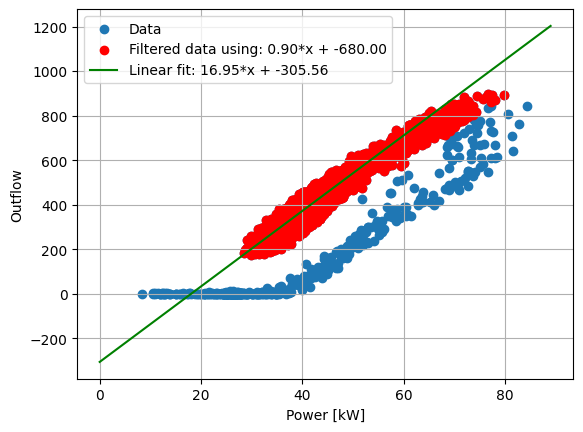

In [16]:
plt.scatter(y=y_test, x=x_test, label="Data")
plt.scatter(y=filtered_y, x=filtered_x, color="red", label=f'Filtered data using: {0.9:.2f}*x + {-680:.2f}')
plt.plot(y_fit, color="g", label=f'Linear fit: {coefficients[0]:.2f}*x + {coefficients[1]:.2f}')
plt.legend()
#plt.xlim(0, 1400)
#plt.ylim(0)
plt.ylabel("Outflow")
plt.xlabel("Power [kW]")
plt.grid(True)

In [17]:
pump_station_data = pd.read_parquet("/home/s193864/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet")
pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] > 0) & (pump_station_data["pump4_rpm"] == 0)]
train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 
x_train = train["pump1_power"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump1_power"].values
y_test = test["outflow"].values

In [18]:
mask = y_test >= 14*x_test-390
filtered_x = x_test[mask]
filtered_y = y_test[mask]

coefficients = np.polyfit(filtered_x, filtered_y, 1)

fit_curve = np.poly1d(coefficients)
x_series = np.arange(0, 90, 1)
y_fit = coefficients[0]*x_series+coefficients[1]

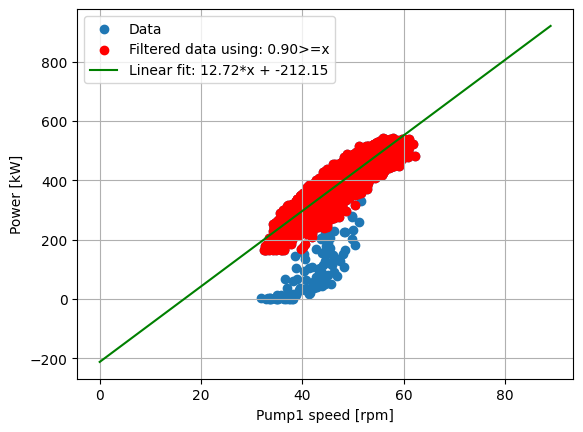

In [19]:
plt.scatter(y=y_test, x=x_test, label="Data")
plt.scatter(y=filtered_y, x=filtered_x, color="red", label=f'Filtered data using: {0.9:.2f}>=x')
plt.plot(y_fit, color="g", label=f'Linear fit: {coefficients[0]:.2f}*x + {coefficients[1]:.2f}')
plt.legend()
#plt.xlim(600)
#plt.ylim(20)
plt.ylabel("Power [kW]")
plt.xlabel("Pump1 speed [rpm]")
plt.grid(True)

# Dynamic Model

In [20]:
pump_station_data = pd.read_parquet("/home/s193864/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet")
pump_station_data.head(5)

train = pump_station_data.loc["2023-01-27":"2023-01-30"]
test = pump_station_data.loc["2023-02-27":"2023-03-02"] 

#Consider resample()
pump_station_data = pump_station_data.resample("1T").mean()

pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] > 0) & (pump_station_data["pump4_rpm"] == 0)]
x_train = train["pump1_rpm"].values.reshape(-1,1)
y_train = train["outflow"].values.reshape(-1,1)
x_test = test["pump1_rpm"].values.reshape(-1,1)
y_test = test["outflow"].values.reshape(-1,1)

In [21]:
import pandas as pd 
from sysidentpy.model_structure_selection import FROLS 
from sysidentpy.basis_function._basis_function import Polynomial 
from sysidentpy.metrics import root_relative_squared_error 
from sysidentpy.utils.display_results import results
import plotly.graph_objects as go
from plotly_resampler import FigureResampler, FigureWidgetResampler
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np



basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_info_values=10,
    extended_least_squares=False,
    ylag=3,
    xlag=3,
    info_criteria="aic",
    estimator="least_squares",
    basis_function=basis_function,
)
model.fit(X=x_train, 
          y=y_train)




/home/s193864/miniconda3/envs/module3_env/lib/python3.11/site-packages/sysidentpy/utils/deprecation.py:37: FutureWarning: Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.
  warnings.warn(message, FutureWarning)


In [22]:
yhat = model.predict(X=x_test, 
                     y=y_test,
                     forecast_horizon=60)

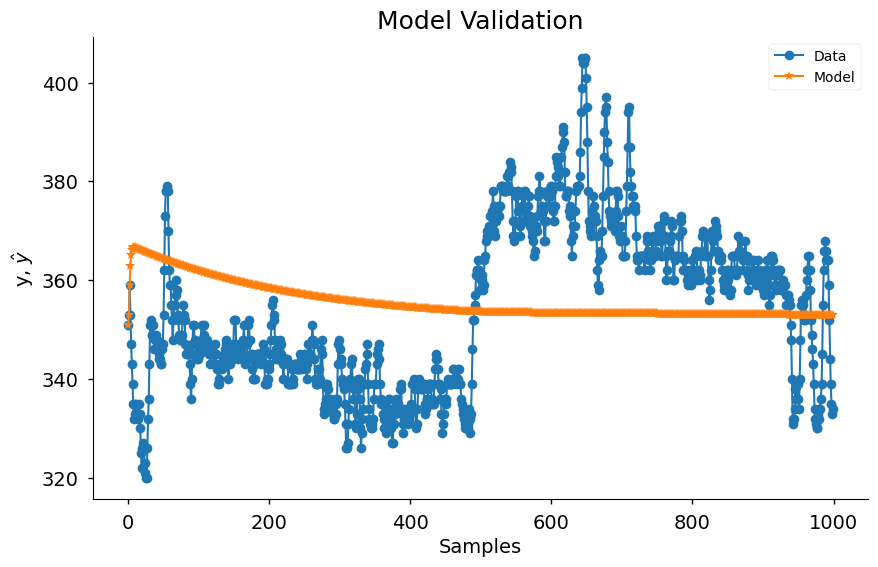

In [23]:
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results

plot_results(y=y_test, yhat=yhat, n=1000, title="Model Validation",
    style='seaborn-v0_8-notebook',
    facecolor="white")

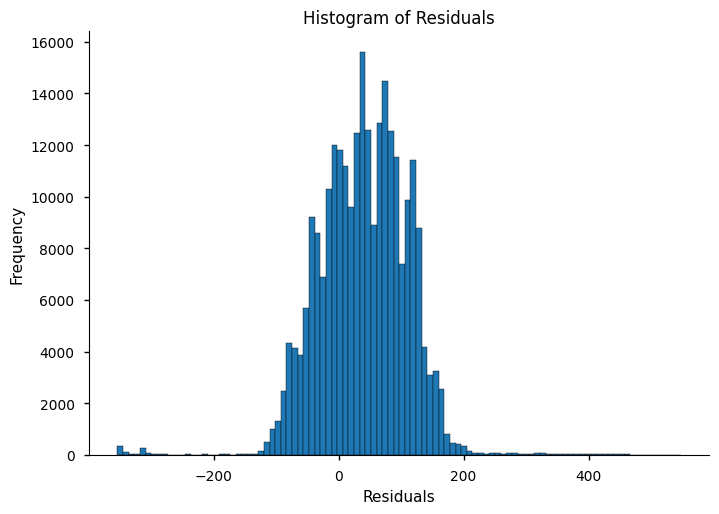

In [24]:
residuals = y_test - yhat

# Plotting the histogram of residuals
plt.hist(residuals, bins=100, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
#plt.xlim(-50,50)
plt.show()

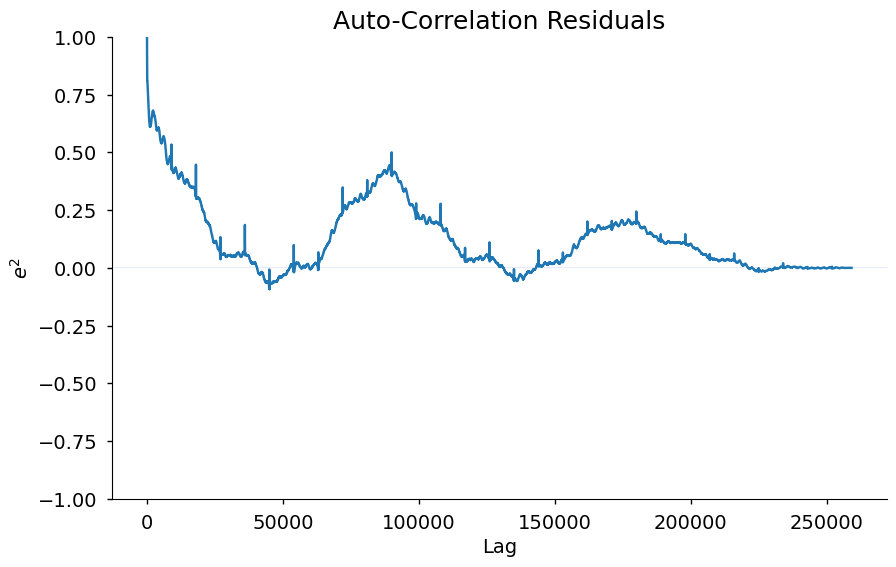

In [25]:
from sysidentpy.utils.plotting import plot_residues_correlation
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation

ee = compute_residues_autocorrelation(y_test, yhat)
plot_residues_correlation(data=ee, title="Auto-Correlation Residuals", ylabel="$e^2$", style='seaborn-v0_8-notebook')

In [26]:
from sysidentpy.residues.residues_correlation import compute_cross_correlation

#x1e = compute_cross_correlation(y_test, yhat, x_test)
#plot_residues_correlation(data=x1e, title="Cross-Correlation Residuals", ylabel="$x_1e$", style='seaborn-v0_8-notebook')

# NEURAL NETWORK


In [27]:
import numpy as np
import pandas as pd

from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.neural_network import NARXNN

from sysidentpy.basis_function._basis_function import Polynomial, Fourier
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import (
    compute_residues_autocorrelation,
    compute_cross_correlation,
)
from sysidentpy.utils.narmax_tools import regressor_code
import torch
from torch import nn
from sysidentpy.utils.display_results import results
from plotly_resampler import FigureResampler, FigureWidgetResampler


In [28]:
from sklearn.preprocessing import StandardScaler

pump_station_data = pd.read_parquet("/home/s193864/Industrial-IoT-For-Digitization-Of-Electronic-Assets-Course/Final Project/data/pump_station_data.parquet")
pump_station_data.head(5)


,height,outflow,pump1_rpm,pump1_power,pump4_rpm,pump4_power
time,,,,,,
2023-01-16 00:00:00.970000+00:00,167.0,533.0,1260.0,57.54,0.0,0.0
2023-01-16 00:00:01.969000+00:00,167.0,534.0,1260.0,55.40,0.0,0.0
2023-01-16 00:00:02.969000+00:00,167.0,527.0,1260.0,58.09,0.0,0.0
2023-01-16 00:00:03.969000+00:00,167.0,521.0,1260.0,58.71,0.0,0.0
2023-01-16 00:00:04.969000+00:00,167.0,521.0,1260.0,54.62,0.0,0.0


In [29]:
pump_station_data = pump_station_data.resample("1T").mean()

In [30]:

pump_station_data = pump_station_data[(pump_station_data["pump1_rpm"] > 0) & (pump_station_data["pump4_rpm"] == 0)]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(pump_station_data)
df_scaled = pd.DataFrame(scaled_data, columns=pump_station_data.columns, index=pump_station_data.index)

train = df_scaled.loc["2023-01-27":"2023-01-30"]
test = df_scaled.loc["2023-02-27":"2023-03-02"] 

#FEATURES = ['height', 'outflow']
FEATURES = "pump1_rpm"
TARGET = 'outflow'

x_train, y_train = train[FEATURES].values.reshape(-1,1), train[TARGET].values.reshape(-1,1)
x_test, y_test= test[FEATURES].values.reshape(-1,1), test[TARGET].values.reshape(-1,1)



In [31]:
fig = FigureWidgetResampler(go.Figure())
fig.update_layout(margin=dict(l=10, r=10, t=10, b=10))
fig.add_trace(go.Scattergl(name=r'Height', showlegend=True), hf_x=df_scaled.index, hf_y=df_scaled['height'])
fig.add_trace(go.Scattergl(name=r'Outflow', showlegend=True), hf_x=df_scaled.index, hf_y=df_scaled['outflow'])
fig.add_trace(go.Scattergl(name=r'pump1_rpm', showlegend=True), hf_x=df_scaled.index, hf_y=df_scaled['pump1_rpm'])
fig.add_trace(go.Scattergl(name=r'pump1_power', showlegend=True), hf_x=df_scaled.index, hf_y=df_scaled['pump1_power'])
fig.add_trace(go.Scattergl(name=r'pump4_rpm', showlegend=True), hf_x=df_scaled.index, hf_y=df_scaled['pump4_rpm'])
fig.add_trace(go.Scattergl(name=r'pump4_power', showlegend=True), hf_x=df_scaled.index, hf_y=df_scaled['pump4_power'])
fig.update_layout(height=400, template="plotly_dark")
display(fig)

FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> Height <i style="color:#fc9944">~1h</i>',
              'showlegend': True,
              'type': 'scattergl',
              'uid': '16d97aa5-ba82-4722-a522-3e0bf40bce06',
              'x': array([datetime.datetime(2023, 1, 16, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 16, 0, 20, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 16, 0, 46, tzinfo=<UTC>), ...,
                          datetime.datetime(2023, 3, 1, 21, 29, tzinfo=<UTC>),
                          datetime.datetime(2023, 3, 1, 21, 56, tzinfo=<UTC>),
                          datetime.datetime(2023, 3, 1, 22, 31, tzinfo=<UTC>)], dtype=object),
              'y': array([ 0.67569686,  0.63327372,  0.86188734, ..., -0.41552076, -0.02899875,
                          -0.03371243])},
             {'name': '<b style="color:sandybrown">[R]</b> Outflow <i style="color:#fc9944">~1h</i>',
           

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [33]:
basis_function = Polynomial(degree=1)

narx_net = NARXNN(
    ylag=2,
    xlag=2,
    basis_function=basis_function,
    model_type="NARMAX",
    loss_func="mse_loss",
    optimizer="Adam",
    #optimizer="sgd",
    epochs=10,
    learning_rate = 4e-3,
    verbose=False,
    optim_params={
        "betas": (0.9, 0.999),
        "eps": 1e-05,
    }, 
)

### Building the network

In [34]:
class NARX(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(4, 50)
        self.lin2 = nn.Linear(50, 50)
        self.lin3 = nn.Linear(50, 1)
        self.tanh = nn.Tanh()

    def forward(self, xb):
        z = self.lin(xb)
        z = self.tanh(z)
        z = self.lin2(z)
        z = self.tanh(z)
        z = self.lin3(z)
        return z

### Passing the defined network to our NARXNN estimator

In [35]:
narx_net.net = NARX()
if device == "cuda": narx_net.net.to(torch.device("cuda"))

### Fit & Predict

In [36]:
narx_net.fit(X=x_train, y=y_train.reshape(-1,1))
#narx_net.fit(X=x_train.reshape(-1,1), y=y_train.reshape(-1,1), X_test=x_test.reshape(-1,1), y_test=y_test.reshape(-1,1))

In [37]:
#yhat = narx_net.predict(X=x_test.reshape(-1,1), y=y_test.reshape(-1,1))
yhat = narx_net.predict(X=x_test, y=y_test.reshape(-1,1))
print("MSE: ", mean_squared_error(y_test, yhat))

MSE:  0.11347039684907119


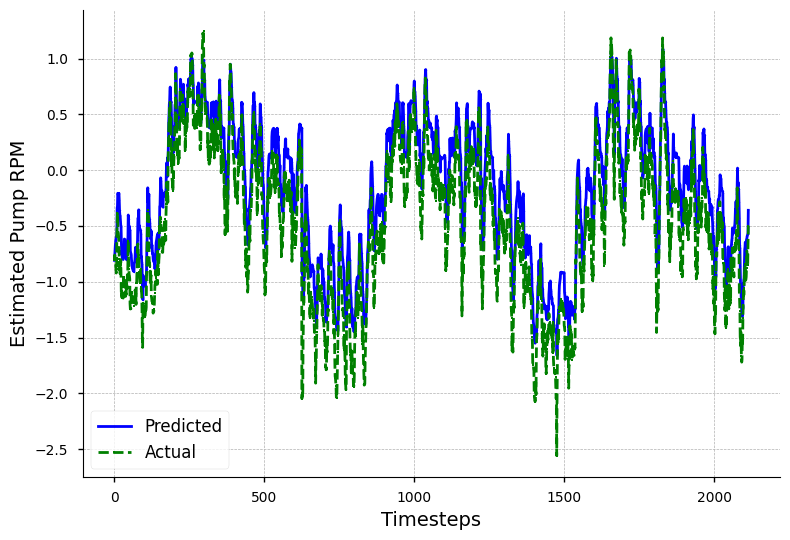

In [38]:
import matplotlib.pyplot as plt 
plt.plot(yhat, color='blue', linestyle='-', linewidth=2, marker='o', markersize=1, label='Predicted')
plt.plot(y_test, color='green', linestyle='--', linewidth=2, marker='s', markersize=1.5, label='Actual')
plt.xlabel('Timesteps', fontsize=14)
plt.ylabel('Estimated Pump RPM', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a legend
plt.legend(fontsize=12)

# Adjusting the margins and layout
plt.tight_layout()

# Show the plot
plt.show()

MSE:  0.11347039684907119


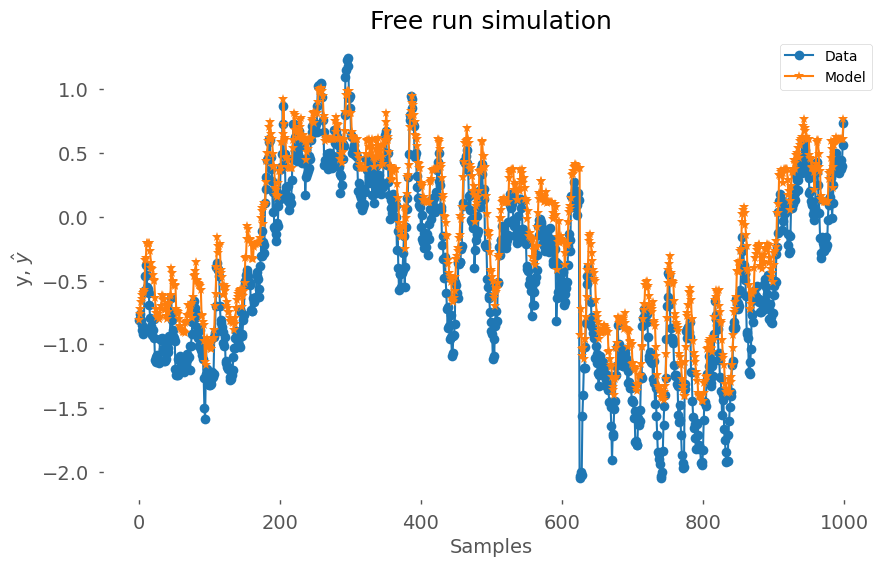

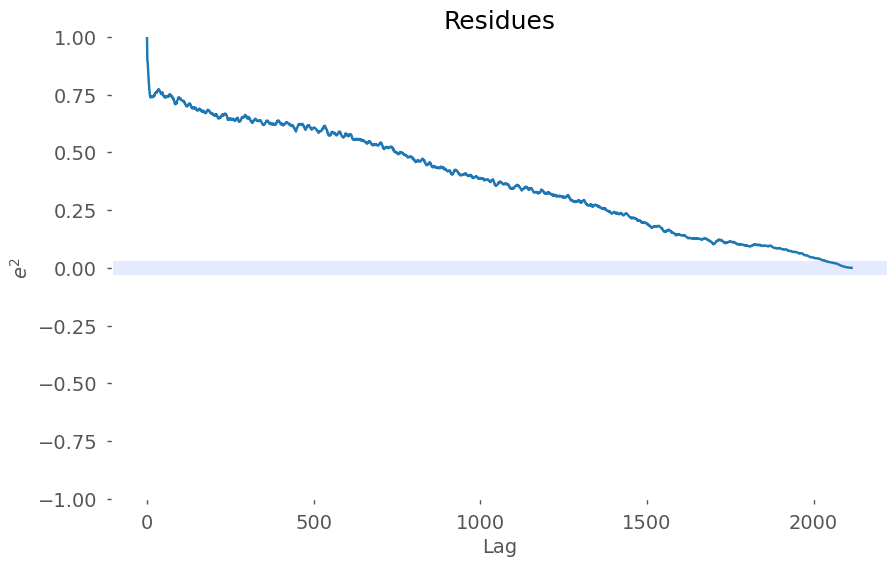

In [39]:
print("MSE: ", mean_squared_error(y_test.reshape(-1,1), yhat.reshape(-1,1)))
plot_results(y=y_test.reshape(-1,1), yhat=yhat.reshape(-1,1), n=1000, style='ggplot')
ee = compute_residues_autocorrelation(y_test.reshape(-1,1), yhat.reshape(-1,1))
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$", style='ggplot')
#x1e = compute_cross_correlation(y_test.reshape(-1,1), yhat.reshape(-1,1), x_test.reshape(-1,1))
#plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$", style='ggplot')

# HERFRA ANER JEG IKKE HVAD DER FOREGÅR

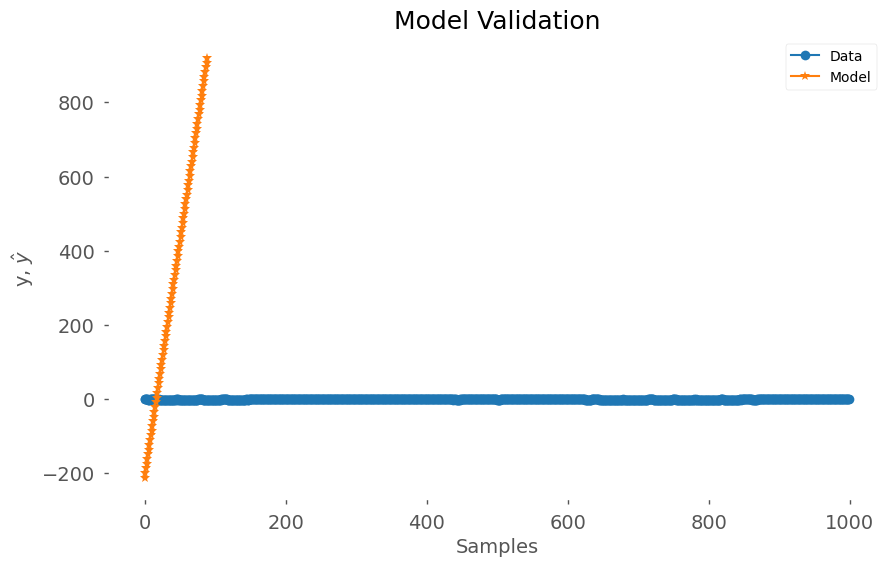

In [40]:
plot_results(y=y_test, yhat=y_fit, n=1000, title="Model Validation",
    style='seaborn-v0_8-notebook',
    facecolor="white")

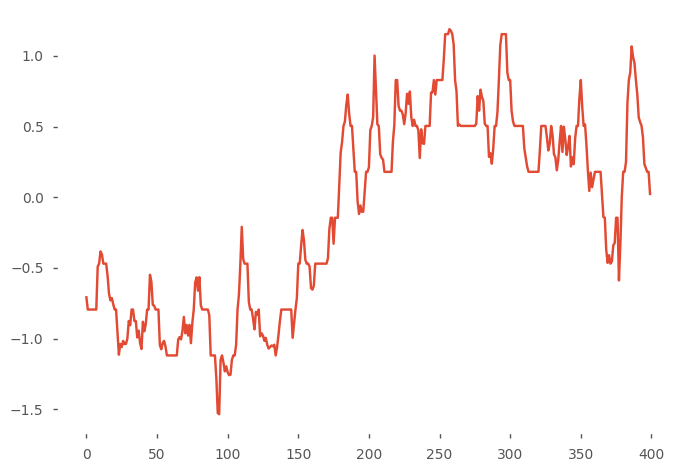

In [41]:
plt.plot(x_test.squeeze()[:400])

In [42]:


rrse = root_relative_squared_error(y_test, 
                                   yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model,
        model.theta,
        model.err,
        model.n_terms,
        err_precision=8,
        dtype="sci",
    ),
    columns=["Regressors", "Parameters", "ERR"],
)
print(r)

0.4947474468631785
      Regressors   Parameters             ERR
0         y(k-1)   1.9171E+00  9.99887155E-01
1         y(k-2)  -9.2701E-01  4.71820795E-05
2         y(k-3)   6.7733E-03  9.05748176E-07
3              1   8.4377E-01  1.47238574E-07
4       y(k-3)^2   3.3647E-03  7.35055976E-08
5   y(k-3)y(k-1)  -2.3411E-03  1.38551616E-06
6       y(k-1)^2  -1.2797E-03  7.71443210E-07
7   y(k-2)y(k-1)   4.3012E-03  2.31007511E-08
8   y(k-3)y(k-2)  -4.0435E-03  4.72290529E-08
9  x1(k-1)y(k-3)   1.9430E-07  1.17671865E-08


# Plots & Stuff

In [43]:
fig = FigureWidgetResampler(go.Figure())
fig.add_trace(go.Scattergl(name='Pump 1 [rpm]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump1_rpm"])
fig.add_trace(go.Scattergl(name='Pump 4 [rpm]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump4_rpm"])
#fig.add_trace(go.Scattergl(name='Pump 1 [kW]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump1_power"])
#fig.add_trace(go.Scattergl(name='Pump 1 [kW]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump4_power"])
#fig.add_trace(go.Scattergl(name='Height', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["height"])
#fig.add_trace(go.Scattergl(name='Outflow', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["outflow"])

fig

fig.update_layout(
    autosize=False,
    width=1200,
    height=750,
    font_family="TimesNewRoman",
    legend=dict(
        title=None, orientation="h", y=-0.40, yanchor="bottom", x=0.5 , xanchor="center", font_color="white"
    ),
    plot_bgcolor='#333',
    paper_bgcolor="#333",
    title="This is graph",
    title_font_color="white",
    title_font_size=30
)

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='gray',
    gridcolor='gray',
    color="white"
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='gray',
    gridcolor='gray',
    color="white",
    ticksuffix="[rpm]", showgrid=True
)

FigureWidgetResampler({
    'data': [{'name': ('<b style="color:sandybrown">[R' ... ' style="color:#fc9944">~1h</i>'),
              'showlegend': True,
              'type': 'scattergl',
              'uid': 'f2de78c2-4b5e-49e2-ac98-76baaec7eeb2',
              'x': array([datetime.datetime(2023, 1, 16, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 16, 0, 3, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 16, 0, 43, tzinfo=<UTC>), ...,
                          datetime.datetime(2023, 3, 1, 21, 19, tzinfo=<UTC>),
                          datetime.datetime(2023, 3, 1, 22, 25, tzinfo=<UTC>),
                          datetime.datetime(2023, 3, 1, 22, 31, tzinfo=<UTC>)], dtype=object),
              'y': array([1264.5, 1290. , 1349. , ..., 1050. , 1080. , 1121. ])},
             {'name': ('<b style="color:sandybrown">[R' ... ' style="color:#fc9944">~1h</i>'),
              'showlegend': True,
              'type': 'scattergl',
            

In [44]:
fig = FigureWidgetResampler(go.Figure())
#fig.add_trace(go.Scattergl(name='Pump 1 [rpm]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump1_rpm"])
#fig.add_trace(go.Scattergl(name='Pump 4 [rpm]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump4_rpm"])
fig.add_trace(go.Scattergl(name='Pump 1 [kW]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump1_power"])
fig.add_trace(go.Scattergl(name='Pump 1 [kW]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump4_power"])
#fig.add_trace(go.Scattergl(name='Height', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["height"])
#fig.add_trace(go.Scattergl(name='Outflow', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["outflow"])

fig

fig.update_layout(
    autosize=False,
    width=1200,
    height=750,
    font_family="TimesNewRoman",
    legend=dict(
        title=None, orientation="h", y=-0.40, yanchor="bottom", x=0.5 , xanchor="center", font_color="white"
    ),
    plot_bgcolor='#333',
    paper_bgcolor="#333",
    title="This is graph",
    title_font_color="white",
    title_font_size=30
)

fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='gray',
    gridcolor='gray',
    color="white"
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='gray',
    gridcolor='gray',
    color="white",
    ticksuffix="[kW]", showgrid=True
)

FigureWidgetResampler({
    'data': [{'name': '<b style="color:sandybrown">[R]</b> Pump 1 [kW] <i style="color:#fc9944">~1h</i>',
              'showlegend': True,
              'type': 'scattergl',
              'uid': '7cad7bd0-6358-49c0-a895-4ce51ac9f731',
              'x': array([datetime.datetime(2023, 1, 16, 0, 0, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 16, 0, 2, tzinfo=<UTC>),
                          datetime.datetime(2023, 1, 16, 0, 42, tzinfo=<UTC>), ...,
                          datetime.datetime(2023, 3, 1, 21, 18, tzinfo=<UTC>),
                          datetime.datetime(2023, 3, 1, 22, 2, tzinfo=<UTC>),
                          datetime.datetime(2023, 3, 1, 22, 31, tzinfo=<UTC>)], dtype=object),
              'y': array([56.87966667, 58.37916667, 61.58666667, ..., 40.37716667, 41.04116667,
                          45.729     ])},
             {'name': '<b style="color:sandybrown">[R]</b> Pump 1 [kW] <i style="color:#fc9944">~1h</i>',
    

In [45]:
fig = FigureWidgetResampler(make_subplots(rows=4, cols=1, shared_xaxes=True))

#fig.add_trace(go.Scattergl(name='Pump 1 [kW]', showlegend=True), hf_x=pump_station_data.index, hf_y=pump_station_data["pump1_power"])

fig.add_trace(go.Scattergl(name='Pump 1 [rpm]', showlegend=True),
        hf_x=pump_station_data_subset.index, 
        hf_y=pump_station_data_subset["pump1_rpm"], 
        row=1, 
        col=1
        )
fig.add_trace(go.Scattergl(name='Pump 4 [rpm]', showlegend=True),
        hf_x=pump_station_data_subset.index, 
        hf_y=pump_station_data_subset["pump4_rpm"], 
        row=1, 
        col=1)

fig.add_trace(go.Scattergl(name='Pump 1 [kW]', showlegend=True),
        hf_x=pump_station_data_subset.index, 
        hf_y=pump_station_data_subset["pump1_power"], 
        row=2, 
        col=1
        )
fig.add_trace(go.Scattergl(name='Pump 4 [kW]', showlegend=True),
        hf_x=pump_station_data_subset.index, 
        hf_y=pump_station_data_subset["pump4_power"], 
        row=2, 
        col=1)
fig.add_trace(go.Scattergl(name='Height', showlegend=True),
        hf_x=pump_station_data_subset.index, 
        hf_y=pump_station_data_subset["height"], 
        row=3, 
        col=1
        )

fig.add_trace(go.Scattergl(name='Outflow', showlegend=True),
        hf_x=pump_station_data_subset.index, 
        hf_y=pump_station_data_subset["outflow"], 
        row=4, 
        col=1)

fig.update_layout(height=1200, width=1200, title_text="Stacked Subplots")
fig.show()

NameError: name 'pump_station_data_subset' is not defined